<a href="https://colab.research.google.com/github/unin-student/ISYS5002---Assignment-2/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [2]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pyinputplus

In [3]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = '0b3ee52629194bf5a305995f09a5fab7.10b8HNjwBqf6KtiH5wWWZ8Pg'

## 📦 Setup and Configuration
Import required packages and setup environment.

In [5]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response


## 🌤️ Weather Data Functions

In [9]:
def get_weather_data(location, forecast_days=5):
    api_key = "707319d8eaa81955d0542f21f32593ae"
    base_url = "http://api.openweathermap.org/data/2.5/"

    try:
        # Get latitude and longitude for the location
        geocode_url = f"{base_url}weather?q={location}&appid={api_key}"
        geocode_response = requests.get(geocode_url)
        geocode_response.raise_for_status()
        geocode_data = geocode_response.json()

        if geocode_data["cod"] != 200:
            print(f"Error: {geocode_data['message']}")
            return None

        lat = geocode_data["coord"]["lat"]
        lon = geocode_data["coord"]["lon"]

        # Get current weather data
        current_weather_url = f"{base_url}weather?lat={lat}&lon={lon}&units=metric&appid={api_key}"
        current_weather_response = requests.get(current_weather_url)
        current_weather_response.raise_for_status()
        current_weather_data = current_weather_response.json()

        # Get the weather forecast using latitude and longitude
        weather_url = f"{base_url}forecast?lat={lat}&lon={lon}&cnt={forecast_days * 8}&units=metric&appid={api_key}" # OpenWeatherMap provides forecast in 3-hour intervals, 8 intervals per day
        weather_response = requests.get(weather_url)
        weather_response.raise_for_status()
        forecast_data = weather_response.json()

        # Combine current and forecast data
        weather_data = {
            "current": current_weather_data,
            "forecast": forecast_data
        }

        return weather_data

    except requests.exceptions.RequestException as e:
        print(f"Error fetching weather data: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

## 📊 Visualisation Functions

In [10]:
def create_temperature_visualisation(weather_data, output_type='display'):
    if not weather_data or 'forecast' not in weather_data:
        print("No weather data available for temperature visualization.")
        return None

    forecast_list = weather_data['forecast']['list']
    dates = [item['dt_txt'] for item in forecast_list]
    temperatures = [item['main']['temp'] for item in forecast_list]

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(dates, temperatures, marker='o', linestyle='-')
    ax.set_title('Temperature Forecast')
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Temperature (°C)')
    ax.tick_params(axis='x', rotation=45)
    plt.grid(True)
    plt.tight_layout()

    if output_type == 'figure':
        return fig
    else:
        plt.show()

In [11]:
def create_precipitation_visualisation(weather_data, output_type='display'):
    if not weather_data or 'forecast' not in weather_data:
        print("No weather data available for precipitation visualization.")
        return None

    forecast_list = weather_data['forecast']['list']
    dates = [item['dt_txt'] for item in forecast_list]
    # Check if 'rain' or 'snow' data exists and get the 3h value, default to 0 if not
    precipitation = [item.get('rain', {}).get('3h', 0) + item.get('snow', {}).get('3h', 0) for item in forecast_list]

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(dates, precipitation)
    ax.set_title('Precipitation Forecast (mm in last 3 hours)')
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Precipitation (mm)')
    ax.tick_params(axis='x', rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()

    if output_type == 'figure':
        return fig
    else:
        plt.show()

## 🤖 Natural Language Processing

In [12]:
from hands_on_ai.chat import get_response

def parse_weather_question(question):
    try:
        # Assuming get_response can take a system message and user message
        response = get_response(prompt)
        # Attempt to parse the response as JSON
        import json
        parsed_data = json.loads(response)
        return parsed_data
    except Exception as e:
        print(f"Error parsing weather question: {e}")
        return None

## 🧭 User Interface

In [14]:
def main_menu():
    print("Welcome to WeatherWise!")
    choices = ['Get Weather Forecast', 'Ask a Weather Question', 'View Visualisations', 'Exit']
    response = pyip.inputMenu(choices, prompt='Please select an option:\n', numbered=True)
    return response

def get_location_input():
    location = pyip.inputStr(prompt='Enter the city or location:\n')
    return location

def get_forecast_days_input():
    days = pyip.inputInt(prompt='Enter the number of forecast days (1-5):\n', min=1, max=5)
    return days

def get_weather_question_input():
    question = pyip.inputStr(prompt='Enter your weather question:\n')
    return question

## 🧩 Main Application Logic

In [13]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    if not parsed_question or not weather_data:
        return "I could not understand your question or retrieve weather data."

    location = parsed_question.get("location")
    time_period = parsed_question.get("time_period")
    weather_attribute = parsed_question.get("weather_attribute")

    try:
        response = get_response(prompt)
        return response
    except Exception as e:
        print(f"Error generating weather response: {e}")
        return "Sorry, I could not generate a response at this time."

## 🧪 Testing and Examples

Welcome to WeatherWise!
Please select an option:
1. Get Weather Forecast
2. Ask a Weather Question
3. View Visualisations
4. Exit
3
Enter the city or location:
Perth AU
Enter the number of forecast days (1-5):
5
Error fetching weather data: 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?q=Perth%20AU&appid=707319d8eaa81955d0542f21f32593ae
Welcome to WeatherWise!
Please select an option:
1. Get Weather Forecast
2. Ask a Weather Question
3. View Visualisations
4. Exit
3
Enter the city or location:
Perth
Enter the number of forecast days (1-5):
5

Generating Visualisations...


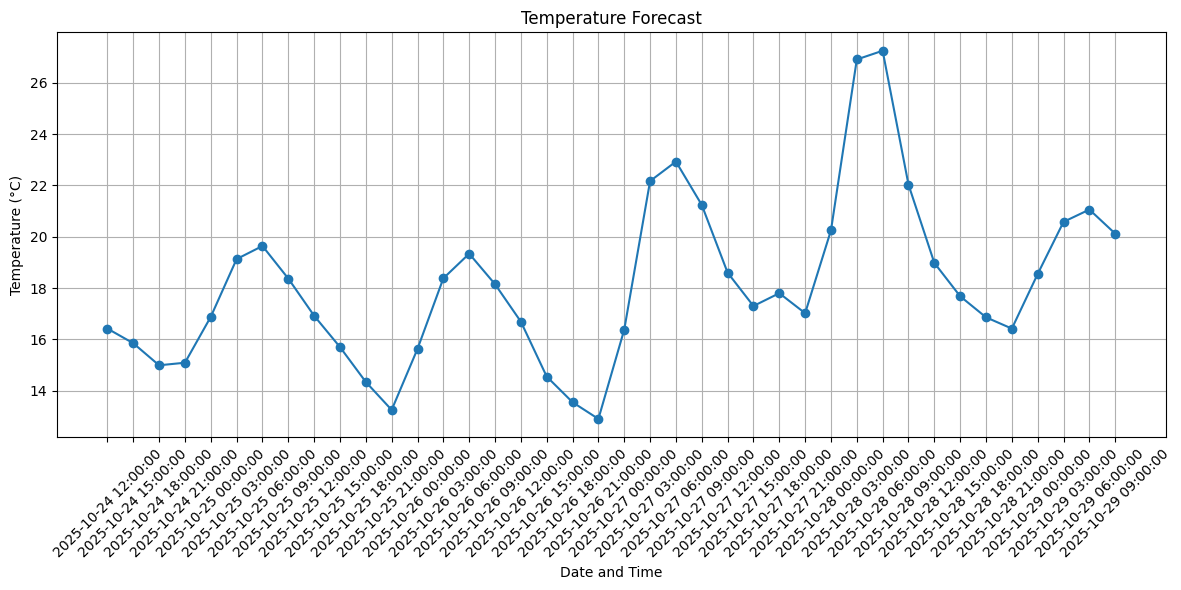

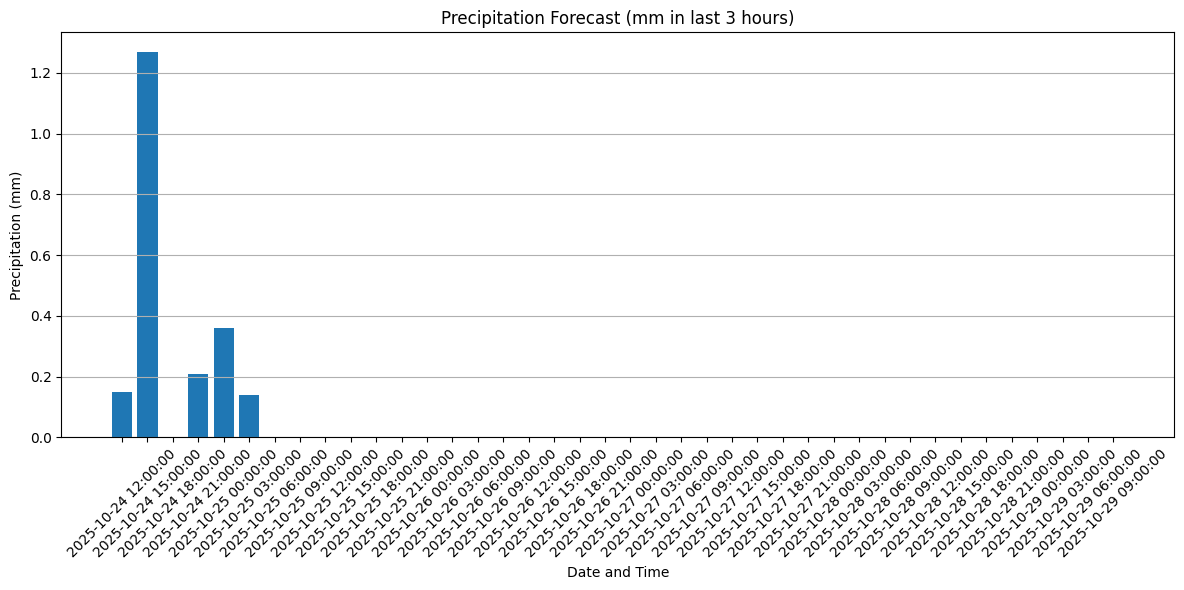

Welcome to WeatherWise!
Please select an option:
1. Get Weather Forecast
2. Ask a Weather Question
3. View Visualisations
4. Exit


KeyboardInterrupt: Interrupted by user

In [15]:
def run_weather_advisor():
    """
    Runs the main weather advisor application loop.
    """
    while True:
        choice = main_menu()

        if choice == 'Get Weather Forecast':
            location = get_location_input()
            days = get_forecast_days_input()
            weather_data = get_weather_data(location, days)
            if weather_data:
                print("\nWeather Forecast:")
                # You can format and print the forecast data here
                # For now, let's just print the raw data
                import json
                print(json.dumps(weather_data, indent=4))

        elif choice == 'Ask a Weather Question':
            question = get_weather_question_input()
            # We need a location for the weather data, maybe ask for it here
            location = get_location_input() # Assuming location is needed for the question as well
            weather_data = get_weather_data(location) # Fetch weather data for the location
            parsed_question = parse_weather_question(question)
            response = generate_weather_response(parsed_question, weather_data)
            print(f"\nWeather Advisor says: {response}")

        elif choice == 'View Visualisations':
            location = get_location_input()
            days = get_forecast_days_input() # Get days for forecast data needed for visualization
            weather_data = get_weather_data(location, days)
            if weather_data:
                print("\nGenerating Visualisations...")
                create_temperature_visualisation(weather_data)
                create_precipitation_visualisation(weather_data)

        elif choice == 'Exit':
            print("Thank you for using WeatherWise!")
            break

if __name__ == "__main__":
    run_weather_advisor()

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.